In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid");

In [2]:
customersDF = pd.read_csv("olist_customers_dataset.csv") 
geolocationDF = pd.read_csv("olist_geolocation_dataset.csv")
order_itemsDF = pd.read_csv("olist_order_items_dataset.csv")
order_paymentsDF = pd.read_csv("olist_order_payments_dataset.csv") 
order_reviewsDF = pd.read_csv("olist_order_reviews_dataset.csv") 

ordersDF = pd.read_csv("olist_orders_dataset.csv", parse_dates=['order_purchase_timestamp', 
                    'order_approved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date','order_delivered_carrier_date'])

productsDF = pd.read_csv("olist_products_dataset.csv")
sellersDF = pd.read_csv("olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("product_category_name_translation.csv") 

In [3]:
customersDF.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocationDF.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_itemsDF.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_paymentsDF.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviewsDF=order_reviewsDF.drop(['review_creation_date', 'review_answer_timestamp'],axis=1)
order_reviewsDF.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...


In [8]:
ordersDF.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [9]:
productsDF=productsDF.drop(columns=['product_name_lenght', 'product_description_lenght'])
productsDF.head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,625.0,20.0,17.0,13.0


In [10]:
sellersDF.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [12]:
masterDF = ordersDF.copy()
masterDF = masterDF.merge(customersDF,on='customer_id',indicator = True)
masterDF = masterDF.merge(order_reviewsDF,on='order_id')
masterDF = masterDF.merge(order_paymentsDF,on='order_id')
masterDF = masterDF.merge(order_itemsDF,on='order_id')
masterDF = masterDF.merge(productsDF,on='product_id')
masterDF = masterDF.merge(sellersDF,on='seller_id')


In [13]:
masterDF.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,7.78,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,ef0996a1a279c26e7ecbd737be23d235,2290,...,7.78,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,9350,maua,SP


In [14]:
masterDF.to_csv("demo.csv",index=False)

In [15]:
masterDF.shape

(117329, 36)

In [16]:
masterDF.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', '_merge', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name', 'product_photos_qty',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [17]:
masterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116094 non-null  datetime64[ns]
 6   order_delivered_customer_date  114858 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   customer_unique_id             117329 non-null  object        
 9   customer_zip_code_prefix       117329 non-null  int64         
 10  customer_city                  117329 non-null  object        
 11  

In [18]:
#One Hot Encoding
onehotencode_dev = pd.get_dummies(masterDF['order_status'], drop_first=True)
masterDF = masterDF.drop('order_status',axis = 1)
masterDF = pd.concat([masterDF, onehotencode_dev], axis = 1)

In [19]:
#One Hot Encoding
onehotencode_dev = pd.get_dummies(masterDF['product_category_name'], drop_first=True)
masterDF = masterDF.drop('product_category_name',axis = 1)
masterDF = pd.concat([masterDF, onehotencode_dev], axis = 1)

In [20]:
#Make ordered list of qty of photos. Belive to have some significance

ordered_list = [i+1 for i in range(20)]
masterDF['product_photos_qty'] = pd.Categorical(masterDF['product_photos_qty'], categories = ordered_list, ordered=True)
masterDF['product_photos_qty'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                  18, 19, 20],
, ordered=True)

In [21]:
#Normalizing the text
masterDF['customer_city'] = masterDF['customer_city'].str.title()
masterDF['customer_state'] = masterDF['customer_state'].str.upper()
masterDF['customer_state'].value_counts()

SP    49527
RJ    15220
MG    13616
RS     6516
PR     5959
SC     4283
BA     4014
DF     2482
GO     2416
ES     2319
PE     1876
CE     1545
MT     1117
PA     1102
MS      854
MA      843
PB      629
PI      568
RN      566
AL      459
SE      395
TO      338
RO      285
AM      170
AC       95
AP       83
RR       52
Name: customer_state, dtype: int64

In [22]:
masterDF['review_comment_title'] = masterDF['review_comment_title'].str.strip().str.lower()

In [23]:
(masterDF['order_estimated_delivery_date'] - masterDF['order_delivered_customer_date']).describe()

count                        114858
mean     11 days 09:18:31.564766929
std      10 days 02:19:26.705030552
min             -189 days +00:35:53
25%                 6 days 13:04:13
50%         12 days 01:33:21.500000
75%                16 days 07:41:12
max               146 days 00:23:13
dtype: object

In [24]:
masterDF['delivery_accuracy'] = ((masterDF['order_estimated_delivery_date'] - masterDF['order_delivered_customer_date']) 
                               / (np.timedelta64(1, 'D')))

In [25]:
masterDF['total_value'] = masterDF['price'].add(masterDF['freight_value'])

In [26]:
masterDF.describe(include='all')

<ipython-input-26-6c2aaa28aa1c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  masterDF.describe(include='all')
<ipython-input-26-6c2aaa28aa1c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  masterDF.describe(include='all')
<ipython-input-26-6c2aaa28aa1c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  masterDF.describe(include='all')
<ipython-input-26-6c2aaa28aa1c>:1: FutureWarning:

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas,delivery_accuracy,total_value
count,117329,117329,117329,117314,116094,114858,117329,117329,117329.000000,117329,...,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,114858.000000,117329.000000
unique,97916,97916,97370,89533,80449,95021,449,94720,NaN,4108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,NaN,Sao Paulo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,63,63,63,63,63,63,652,75,NaN,18582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35060.118112,NaN,...,0.000128,0.052510,0.000017,0.001696,0.000724,0.039990,0.002293,0.062482,11.387865,140.551863
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29849.496175,NaN,...,0.011306,0.223055,0.004129,0.041149,0.026906,0.195937,0.047827,0.242031,10.096837,190.044820
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-188.975081,6.080000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11250.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.544595,55.240000


## EDA Questions
- How e_commerce has evolved over time in Brazil?
- Where do most customers/sellers come from?
- What are the most/least frequent products bought?
- What are the top 10 most rated products?

### How e_commerce has evolved over time in Brazil?

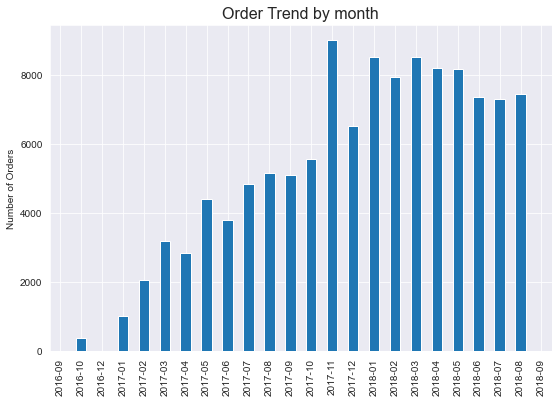

In [27]:
masterDF['yearmonth'] =masterDF['order_purchase_timestamp'].dt.to_period('M')
masterDF.groupby('yearmonth').size().plot(
    kind = 'bar',
    figsize=(9,6)
)
sns.set(font_scale = 1.3)
plt.title('Order Trend by month',fontsize=16);
plt.ylabel('Number of Orders');
plt.xlabel('');


The trend continues to grow, as evidenced by the bar plot. As expected, we discovered that the number of orders in November 2017 reaches a new high, most likely due to Black Friday. However, because the data for 2016 and 2018 is incomplete, we were unable to compare the year-to-year trend.

### On what days of week brazilians customers tend to do online shopping?

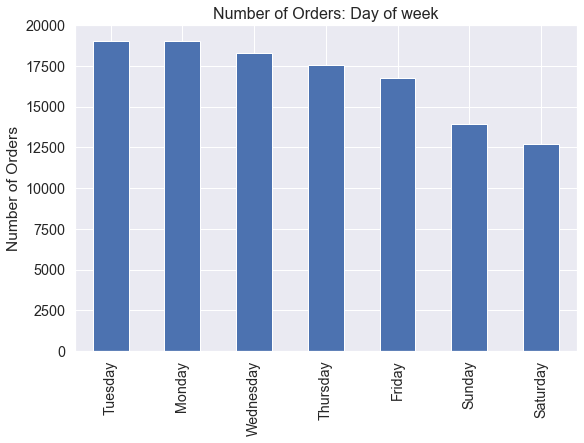

In [28]:
masterDF['weekday'] = masterDF['order_purchase_timestamp'].dt.day_name()
masterDF.groupby('weekday').size().sort_values(ascending = False).plot(
    kind = 'bar',
    figsize=(9,6)
)

sns.set(font_scale = 1.2)
plt.title('Number of Orders: Day of week',fontsize=16);
plt.ylabel('Number of Orders');
plt.xlabel('');


It may appear surprising at first that Brazilians place more online orders during the week than on weekends. However, this is indeed consistent with the general E-commerce shopping trend. The weekend is the quietest time for E-commerce, with sales beginning to fall on Friday as people have more leisure time.

### Where do most customers come from?

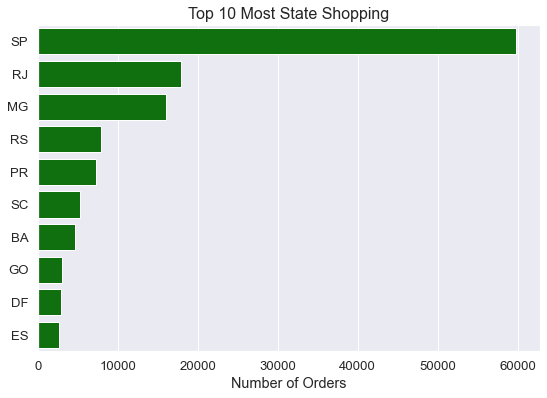

In [30]:
top_10_state_shopping = masterDF['order_item_id'].groupby(masterDF['customer_state']).sum().sort_values(ascending=False)[:10]
fig=plt.figure(figsize=(9,6))
sns.set(font_scale = 1.2)
sns.barplot(y=top_10_state_shopping.index,x=top_10_state_shopping.values, color = 'green');
plt.title('Top 10 Most State Shopping',fontsize=16);
plt.xlabel('Number of Orders');
plt.ylabel('',fontsize=16);


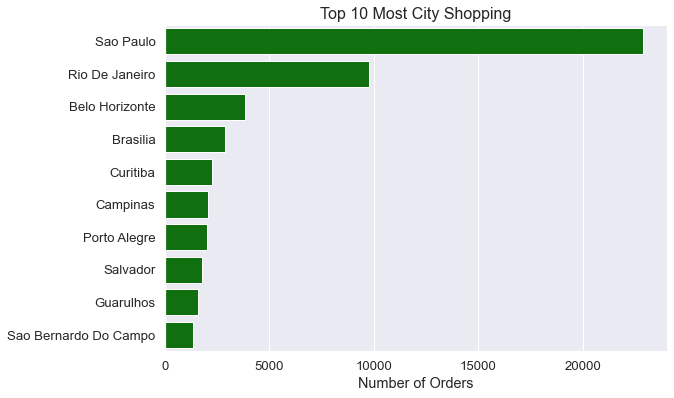

In [31]:
top_10_city_shopping = masterDF['order_item_id'].groupby(masterDF['customer_city']).sum().sort_values(ascending=False)[:10]
fig=plt.figure(figsize=(9,6))
sns.set(font_scale = 1.2)
sns.barplot(y=top_10_city_shopping.index,x=top_10_city_shopping.values, color = 'green');
plt.title('Top 10 Most City Shopping',fontsize=16);
plt.xlabel('Number of Orders');
plt.ylabel('',fontsize=16);


Sao Paulo has the most customers, followed by Rio de Janeiro. This is not surprising given that Sao Paulo and Rio de Janeiro are Brazil's two most populous cities.

### Where do most sellers come from?

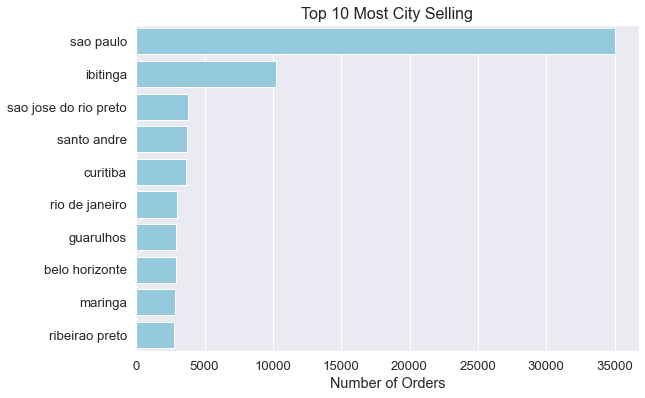

In [32]:
top_10_city_selling = masterDF['order_item_id'].groupby(masterDF['seller_city']).sum().sort_values(ascending=False)[:10]
fig=plt.figure(figsize=(9,6))
sns.set(font_scale = 1.2)
sns.barplot(y=top_10_city_selling.index,x=top_10_city_selling.values, color = 'skyblue');
plt.title('Top 10 Most City Selling',fontsize=16);
plt.xlabel('Number of Orders');
plt.ylabel('',fontsize=16);

Sao Paulo and Ibitinga are the top two cities with the most selling orders, with Sao Paulo being the largest city in Brazil and Ibitinga being a municipality in the state of Sao Paulo.

### What are the most frequent products/categories bought?

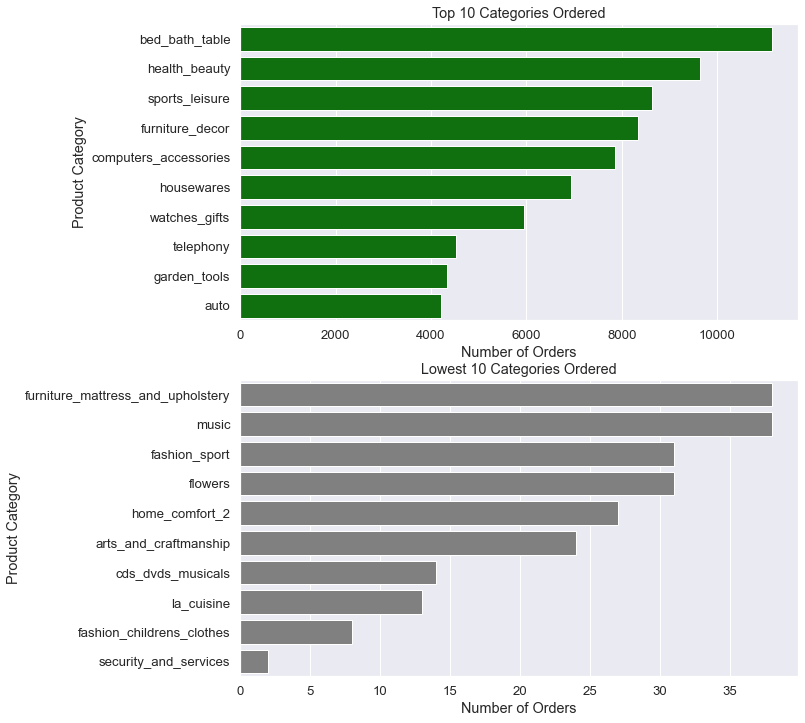

In [33]:
df = pd.merge(ordersDF, order_itemsDF, on="order_id")
df = df.merge(customersDF, on="customer_id")
df = df.merge(productsDF, on="product_id")
df = df.merge(product_category_name_translation, on="product_category_name")
df = df.merge(order_reviewsDF, on="order_id")

top_products = df['product_category_name_english'].value_counts().reset_index().nlargest(10,'product_category_name_english')
lowest_products = df['product_category_name_english'].value_counts().reset_index().nsmallest(10,'product_category_name_english')[::-1]

sns.set(font_scale = 1.2)

plt.figure(figsize = (10,12))

plt.subplot(211)
sns.barplot(data = top_products, x = 'product_category_name_english', y = 'index', color = 'green')
plt.title('Top 10 Categories Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category');

plt.subplot(212)
sns.barplot(data = lowest_products, x = 'product_category_name_english', y = 'index', color = 'grey')
plt.title('Lowest 10 Categories Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category');


The top three categories are **bed and bath**, **health and beauty**, and **sports and leisure**. This could be due to the fact that products in these categories are used on a regular basis, and customers prefer to buy them online because of the convenience.

People are more likely to explore and purchase products related to **security and services** and **la cuisine** in person. As a result, online sales are relatively low.

### What are the top 10 most rated products?

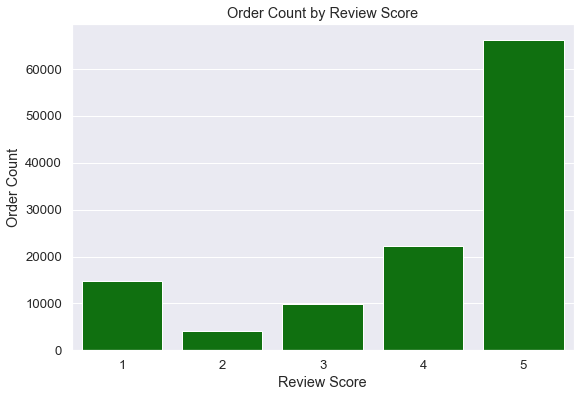

In [34]:
plt.figure(figsize = (9,6))
sns.barplot(data = masterDF.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id', color = 'green')
plt.title('Order Count by Review Score');
plt.ylabel('Order Count');
plt.xlabel('Review Score');

The majority of orders have received five-star evaluations. Except for 1, the order counts decrease as the ratings decrease. A review score of one has more orders than a score of two or three.

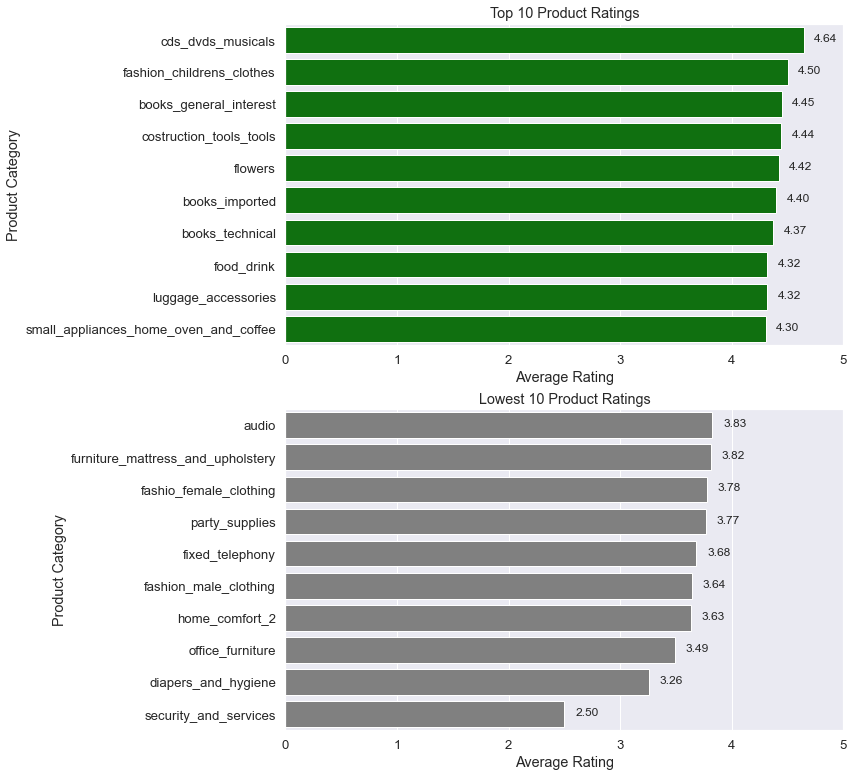

In [35]:
prd_rev_means = df.groupby('product_category_name_english').mean()['review_score'].reset_index()
top_10_ratings = prd_rev_means.sort_values('review_score', ascending = False).nlargest(10,'review_score')
lowest_10_ratings = prd_rev_means.sort_values('review_score', ascending = False).nsmallest(10,'review_score')[::-1]

plt.figure(figsize = (10,13))

plt.subplot(211)
plot1 = sns.barplot(data = top_10_ratings, x = 'review_score', y = 'product_category_name_english', color = 'green')
plt.title('Top 10 Product Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Product Category');
plt.xlim(0,5);

for bar in plot1.patches:
    plot1.annotate(format(bar.get_width(), '.2f'),
                   (bar.get_width()+.2, bar.get_y()+0.6,
                    ), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')


plt.subplot(212)
plot2 = sns.barplot(data = lowest_10_ratings, x = 'review_score', y = 'product_category_name_english', color = 'grey')

plt.title('Lowest 10 Product Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Product Category');
plt.xlim(0,5);

for bar in plot2.patches:
    plot2.annotate(format(bar.get_width(), '.2f'),
                   (bar.get_width()+.2, bar.get_y()+0.6,
                    ), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

**CD, DVD, and Musicals**, **children's clothing**, and **books** received high average ratings. Various types of books, in particular, receive positive feedback. This makes sense because, unlike clothes for adults, which may be found to be too large/small or of poor quality... music and books are purchased based on the customer's preferences and have fewer reasons to receive a negative review. This implies that selling movies, books, and music is a great way to get good reviews.

**Insurance Services** has the lowest rating while also having the fewest orders. Because this service is currently rarely purchased online, and the reviews are generally negative, it suggests that sellers either improve the insurance services or discontinue selling them entirely.